## Task 1

In [251]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt 

def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def forel(points, r):
    clusters = []
    while points:
        # Выбираем случайную точку из списка точек и назначаем ее центром кластера
        center = random.choice(points)
        cluster = [center]
        points.remove(center)
        while True:
            #neighbors содержит все точки, находящиеся в окрестности центра кластера с радиусом r
            neighbors = [p for p in points if dist(p, center) <= r]
            if not neighbors:
                break
            # Вычисляем новый центр кластера как среднее арифметическое координат всех точек из списка neighbors
            new_center = tuple(map(lambda x: sum(x) / len(x), zip(*neighbors)))
            if new_center == center:
                break
            center = new_center
            cluster.extend(neighbors)
            for n in neighbors:
                points.remove(n)
        clusters.append(cluster)
    return clusters

points = [[random.uniform(0, 100), random.uniform(0, 100)] for _ in range(100)]
clusters = forel(points, 20)


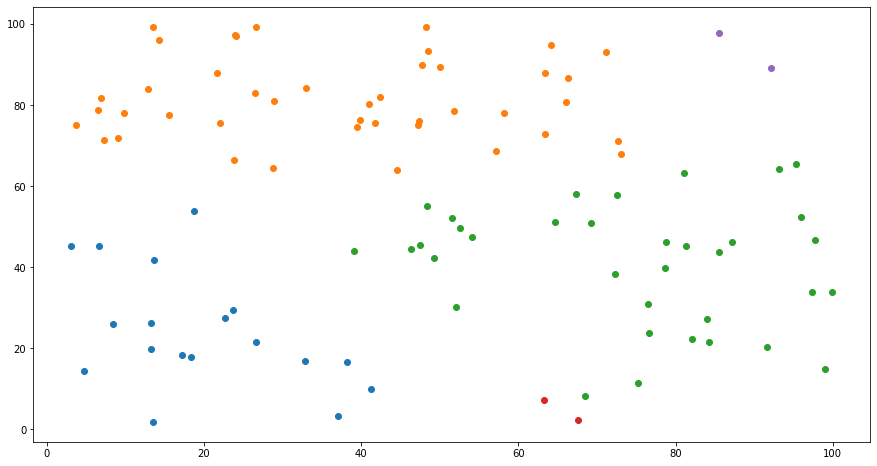

In [252]:
for cluster in clusters:
    ar = np.array(cluster)
    plt.scatter(ar[:, 0], ar[:, 1])

In [224]:
for cluster in clusters:
    ar = np.array(cluster)
    plt.scatter(ar[:, 0], ar[:, 1])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (1, 2, 1000) + inhomogeneous part.

## Task 2. Region growing

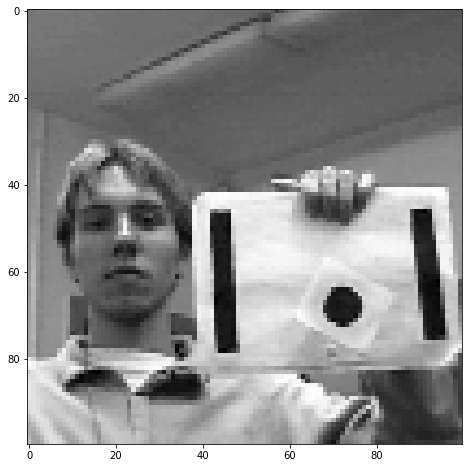

In [123]:
import cv2
import numpy as np

def region_growing(img, seed, threshold = 20):
    # Создаем пустое изображение с такими же размерами, как исходное изображение
    height, width = img.shape[:2]
    region = np.zeros((height, width), np.uint8)
    # Создаем список начальных точек
    seeds = []
    seeds.append((seed[0], seed[1]))
    # Пока список начальных точек не пустой
    while len(seeds) > 0:
        # Получаем координаты текущей точки
        current_point = seeds[0]
        x = current_point[0]
        y = current_point[1]
        # Добавляем текущую точку в регион
        region[x,y] = img[x,y] #255
        # Удаляем текущую точку из списка начальных точек
        seeds.pop(0)
        # Проверяем соседние пиксели и добавляем их в список начальных точек, если они похожи на начальную точку
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                if x + i < 0 or y + j < 0 or x + i >= height or y + j >= width:
                    continue
                if abs(int(img[x+i,y+j]) - int(img[x,y])) < threshold and region[x+i,y+j] == 0:
                    seeds.append((x+i,y+j))
                    region[x+i,y+j] = img[x+i,y+j] #255
    return region

img = cv2.imread('data/1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

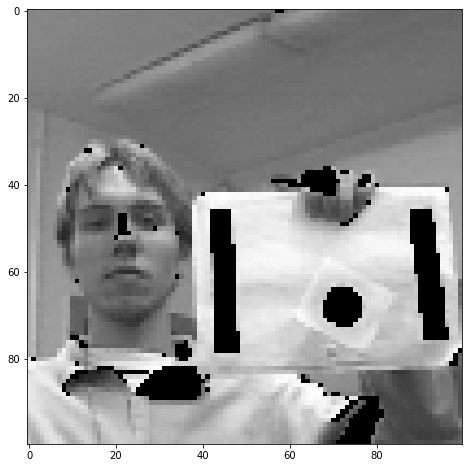

In [124]:
region = region_growing(img, seed=[0,0],threshold=20)
plt.imshow(region, cmap='gray')

## Task 3. Harris corner detector

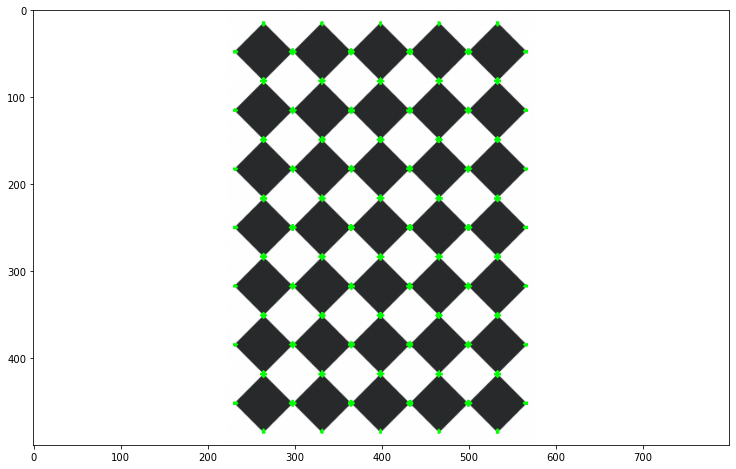

In [39]:
def harris_corner_detector(image, window_size=5, k=0.04):
    img_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Вычисляем производные по x и y изображения
    Ix = cv2.Sobel(img_grayscale, cv2.CV_64F, 1, 0, )
    Iy = cv2.Sobel(img_grayscale, cv2.CV_64F, 0, 1, )

    # Вычисляем произведения производных на каждом пикселе.
    Ix2 = Ix**2
    Iy2 = Iy**2
    Ixy = Ix*Iy

    # Вычисляем суммы произведений производных на каждом пикселе.
    Sx2 = cv2.boxFilter(Ix2, -1, (window_size, window_size), normalize=False)
    Sy2 = cv2.boxFilter(Iy2, -1, (window_size, window_size), normalize=False)
    Sxy = cv2.boxFilter(Ixy, -1, (window_size, window_size), normalize=False)

    # Вычисляем определитель и след сумм произведений производных на каждом пикселе.
    det = (Sx2 * Sy2) - (Sxy**2)
    trace = Sx2 + Sy2

    # Вычисляем ответ Харриса для каждого пикселя.
    R = det - k * (trace**2)

    # Применяем порог.
    R[R < k*R.max()] = 0

    return R

img = cv2.imread("data/desk.jpg")

R = harris_corner_detector(img)

img[R > 0.01*R.max()] = [0, 255, 0]

plt.imshow(img)

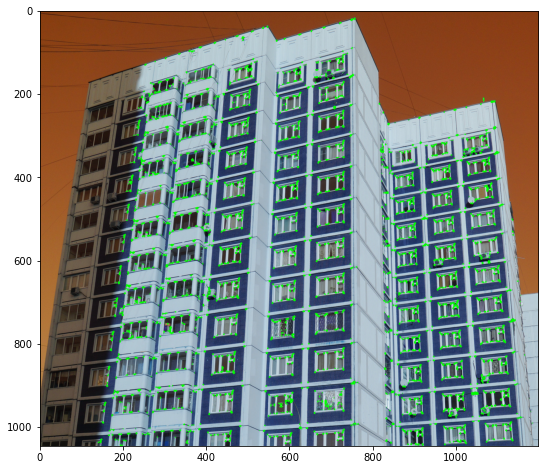

In [40]:
img = cv2.imread("data/building.jpg")

R = harris_corner_detector(img)

img[R > 0.01*R.max()] = [0, 255, 0]

plt.imshow(img)